Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9798657718120806
Logistic Regression Confusion Matrix:
[[5823  120]
 [   0   17]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      5943
         1.0       0.12      1.00      0.22        17

    accuracy                           0.98      5960
   macro avg       0.56      0.99      0.61      5960
weighted avg       1.00      0.98      0.99      5960

--------------------------------------------------
Random Forest Accuracy: 0.9996644295302013
Random Forest Confusion Matrix:
[[5942    1]
 [   1   16]]
Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5943
         1.0       0.94      0.94      0.94        17

    accuracy                           1.00      5960
   macro avg       0.97      0.97      0.97      5960
weighted avg       1.00      1.00      1.00      5960


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [18:05:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9998322147651006
XGBoost Confusion Matrix:
[[5942    1]
 [   0   17]]
XGBoost Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5943
         1.0       0.94      1.00      0.97        17

    accuracy                           1.00      5960
   macro avg       0.97      1.00      0.99      5960
weighted avg       1.00      1.00      1.00      5960

--------------------------------------------------


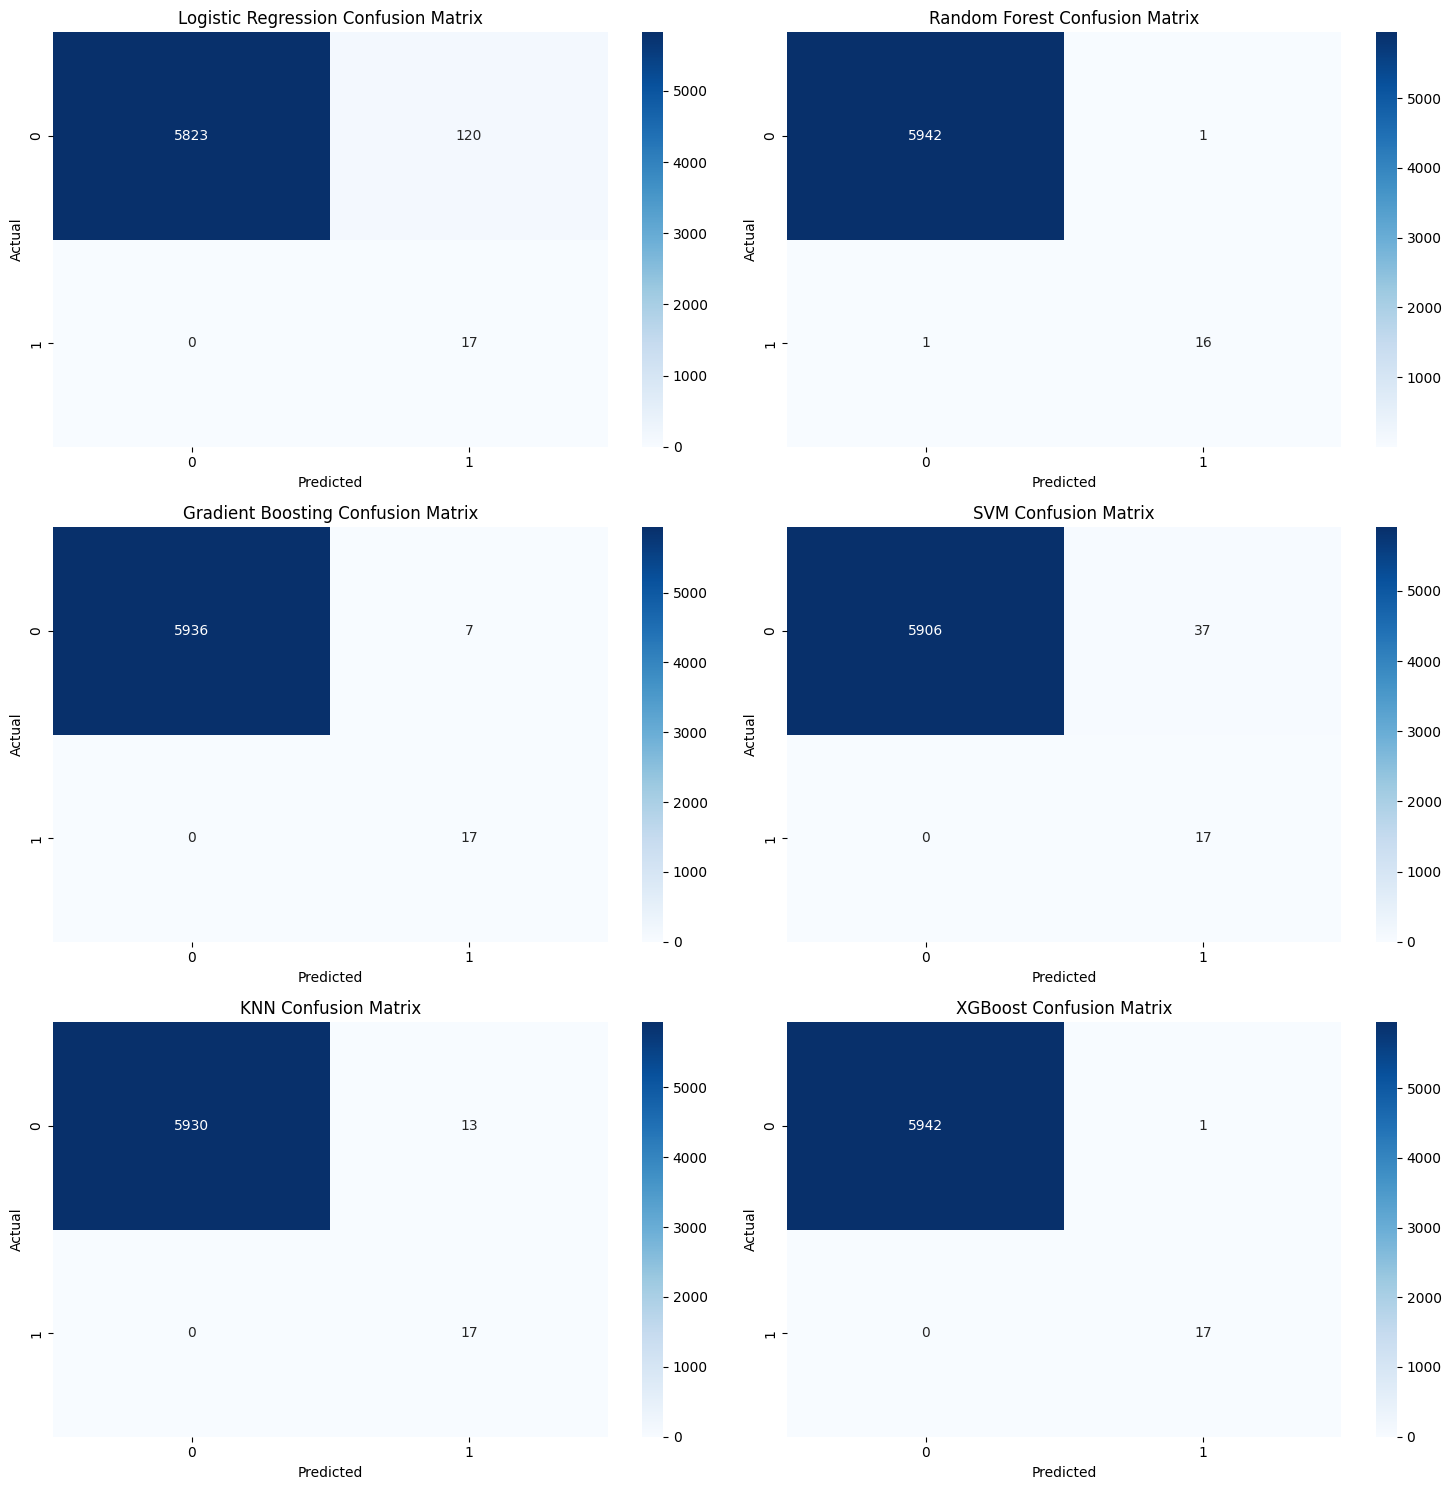

In [ ]:
# Rhythm
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Check for missing values
print(data.isnull().sum())

# Drop rows with missing target values
data = data.dropna(subset=['Class'])

# Drop or fill missing values in other columns if necessary
data = data.dropna()  # You can also use data.fillna(value) if dropping is not preferred

# Split data into features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Define models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)

    accuracy = np.mean(y_pred == y_test)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    results[model_name] = {
        'accuracy': accuracy,
        'conf_matrix': conf_matrix,
        'class_report': class_report
    }

    print(f'{model_name} Accuracy: {accuracy}')
    print(f'{model_name} Confusion Matrix:')
    print(conf_matrix)
    print(f'{model_name} Classification Report:')
    print(class_report)
    print('-'*50)

# Optionally, plot confusion matrices
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for i, (model_name, result) in enumerate(results.items()):
    sns.heatmap(result['conf_matrix'], annot=True, fmt='d', cmap='Blues', ax=axes[i])
    axes[i].set_title(f'{model_name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()
